<a href="https://colab.research.google.com/github/Kehar-Asadullah/MachineLearning-for-beginners/blob/main/Patient_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import accuracy_score

Mounted at /content/drive


In [ ]:
stroke = pd.read_csv('Path/stroke-data.csv')
#stroke.sample() # randomly selects any row from dataset
stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
# Data Engineering performs these tasks
# 1. Requirement gathering
# 2. Pipeline creation
# 3. Data gathering
# 4. Data Analysis

In [ ]:
stroke.head() # selects first five rows

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
type(stroke)

pandas.core.frame.DataFrame

In [ ]:
stroke.tail(3) 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [ ]:
stroke.dtypes # some are numerical, some are categorical, its object

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
stroke.describe()# describes numerical colomns

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
stroke.shape # row by colomns

(5110, 12)

In [ ]:
stroke.ndim # 2-D data

2

In [ ]:
stroke.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
stroke.stroke.nunique() # number of uniqe values

2

In [ ]:
stroke['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [ ]:
stroke.stroke.unique() # whcih unique values

array([1, 0])

In [ ]:
#fromula to calculate the percentage of earch :(normal/stroke)
stroke.stroke.value_counts().rename('Count'),
stroke.stroke.value_counts(True).rename('%').mul(100) 
# 95% Normal, 4.8% stroke means IMBALANCED data
# classifier may not be trained properly->overfitting
# for balancing data
# smooth: oversampling, 
# decrease data in class where it is in abundance

In [ ]:
stroke["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
#Note: this n above cell has same results
stroke.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
stroke.stroke.sample(20)

3070    0
1198    0
4901    0
3739    0
2271    0
3559    0
227     1
4325    0
654     0
646     0
4725    0
2941    0
1104    0
2106    0
3054    0
1235    0
119     1
3623    0
4519    0
1109    0
Name: stroke, dtype: int64

Text(0.5, 1.0, 'Number of Patient')

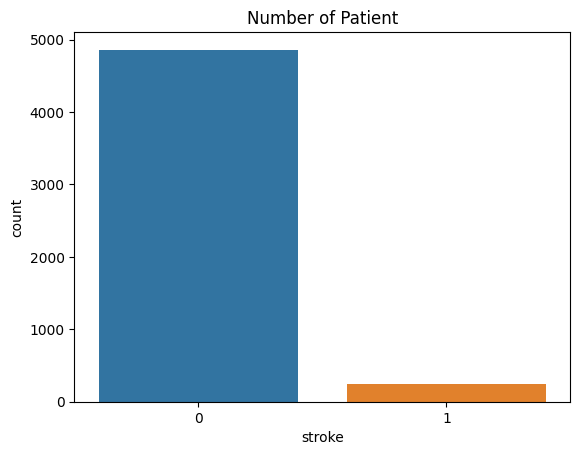

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# show number of patient by stroke
sns.countplot(data=stroke, x = 'stroke')
plt.title('Number of Patient')

In [ ]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
print("Missing Values")
stroke.isnull()

Missing Values


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,False,True,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
stroke.isnull().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [ ]:
stroke.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
print("Missing data sum :")
print(stroke.isnull().sum())

print("\nMissing data percentage (%)")
print(stroke.isnull().sum()/stroke.count()*100)

Missing data sum :
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Missing data percentage (%)
id                   0.00000
gender               0.00000
age                  0.00000
hypertension         0.00000
heart_disease        0.00000
ever_married         0.00000
work_type            0.00000
Residence_type       0.00000
avg_glucose_level    0.00000
bmi                  4.09452
smoking_status       0.00000
stroke               0.00000
dtype: float64


In [ ]:
# seperate categorical and numerical features
cat_features = [feature for feature in stroke.columns if stroke[feature].dtype =='O']
print("Number of categorical variables", len(cat_features))
print('*'*80)
print('Categorical variables column name: ', cat_features)

Number of categorical variables 5
********************************************************************************
Categorical variables column name:  ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [ ]:
df = pd.DataFrame(cat_features)
df.head()

,0
0,gender
1,ever_married
2,work_type
3,Residence_type
4,smoking_status


In [ ]:
numerical_features = [feature for feature in stroke.columns if stroke[feature].dtype != 'O']
print("Number of Numerical variables:", len(numerical_features))
print('*'*80)
print('Numerical Variable Column:', numerical_features)

Number of Numerical variables: 7
********************************************************************************
Numerical Variable Column: ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


In [ ]:
numerical_features

['id',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'stroke']

In [ ]:
stroke.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5105    False
5106    False
5107    False
5108    False
5109    False
Length: 5110, dtype: bool

In [ ]:
stroke.duplicated().sum()

0

In [ ]:
stroke["gender"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [ ]:
stroke["age"].nunique()



104

In [ ]:
stroke["age"].sample(10)

1340    47.0
429     53.0
1381    78.0
5023    37.0
599     59.0
574     18.0
1435    54.0
820     21.0
5100    82.0
4957    34.0
Name: age, dtype: float64

In [ ]:
stroke["hypertension"].unique()

array([0, 1])

In [ ]:
stroke["heart_disease"].unique()

array([1, 0])

In [ ]:
stroke["ever_married"].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
stroke["work_type"].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [ ]:
stroke["Residence_type"].unique()

array(['Urban', 'Rural'], dtype=object)

In [ ]:
stroke["avg_glucose_level"].nunique()

3979

In [ ]:
stroke["avg_glucose_level"].unique()

array([228.69, 202.21, 105.92, ...,  82.99, 166.29,  85.28])

In [ ]:
stroke["bmi"].nunique()

418

In [ ]:
stroke['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [ ]:
stroke["stroke"].unique()

array([1, 0])

[Text(0.5, 1.0, 'Correlation Matrix')]

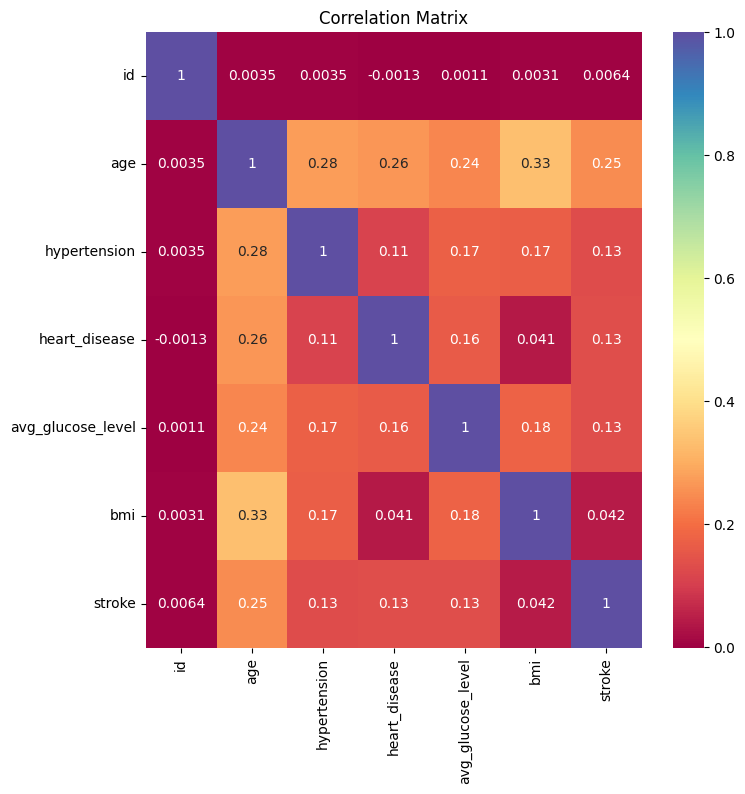

In [ ]:
# correlation matrix
corr = stroke.corr()
plt.figure(figsize=(8,8))
sns.heatmap(data=corr, annot=True, cmap='Spectral').set(title="Correlation Matrix")

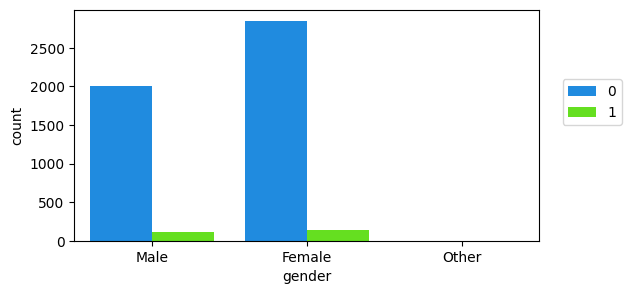

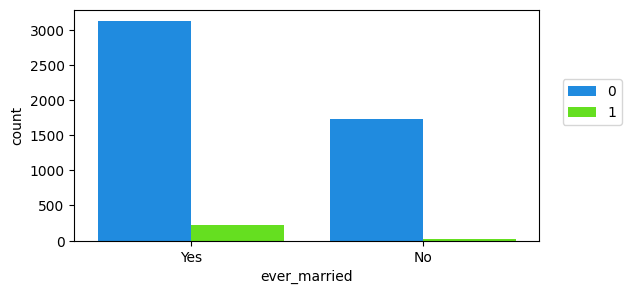

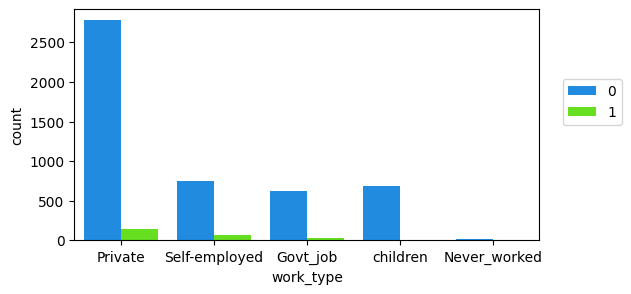

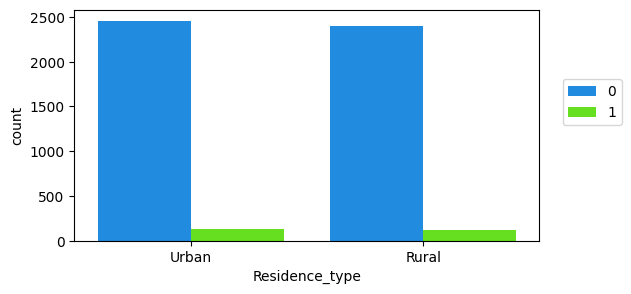

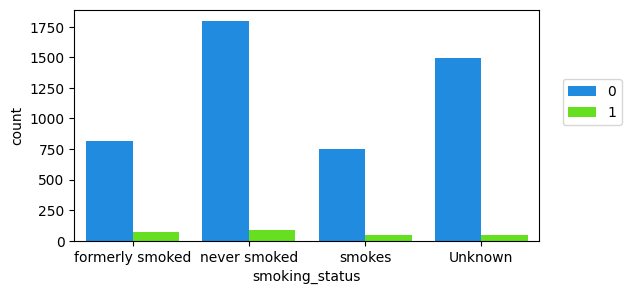

In [ ]:
# visualizing categorical features
for col in cat_features[:]:
  plt.figure(figsize=(6,3), dpi=100)
  sns.countplot(data=stroke, x=col, hue='stroke', palette='gist_rainbow_r')
  plt.legend(loc=(1.05,0.5))

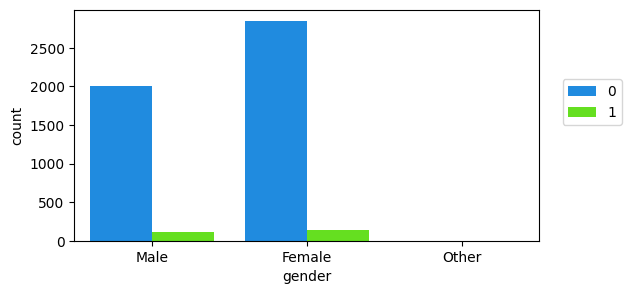

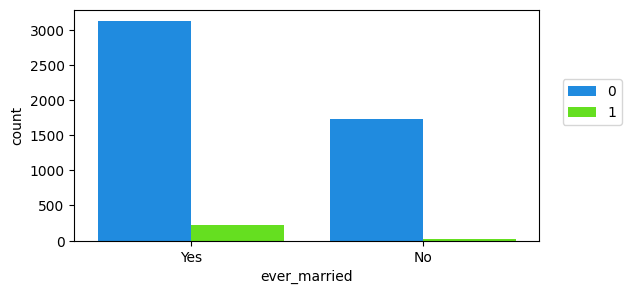

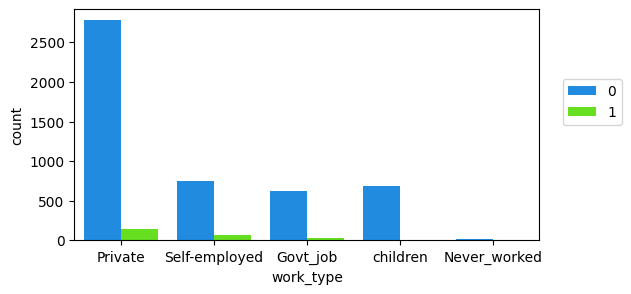

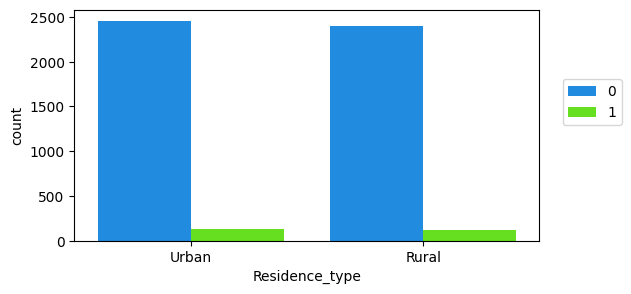

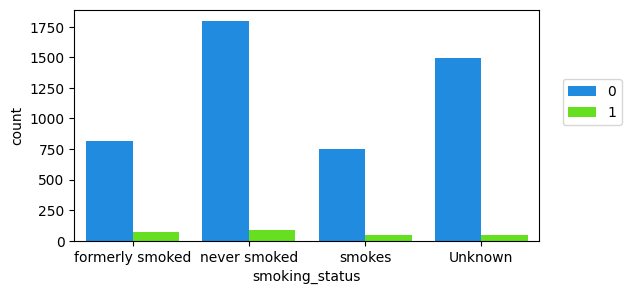

In [ ]:
# visualizing categorical features
for col in cat_features[:]:
  plt.figure(figsize=(6,3), dpi=100)
  sns.countplot(data=stroke, x=col, hue='stroke', palette='gist_rainbow_r')
  plt.legend(loc=(1.05,0.5))

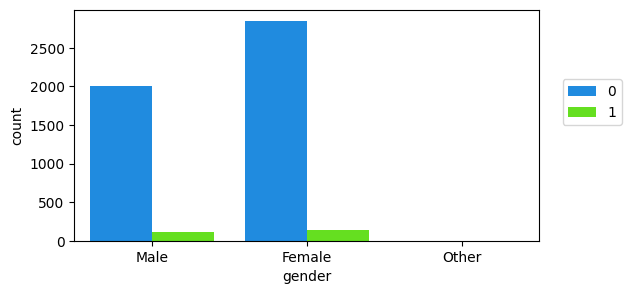

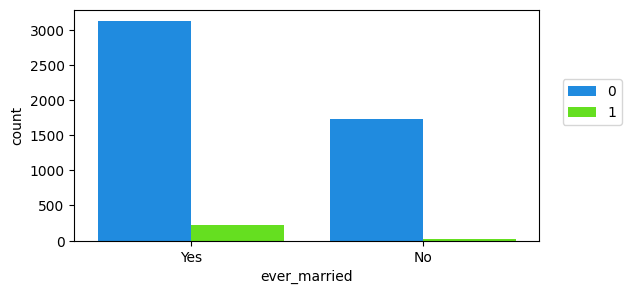

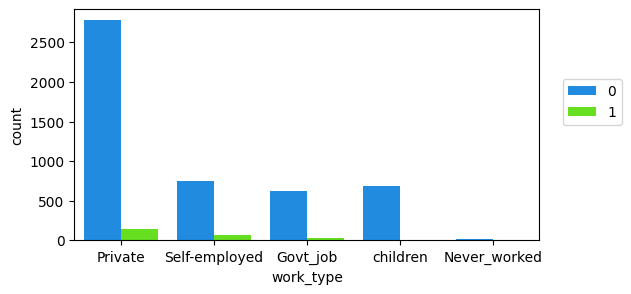

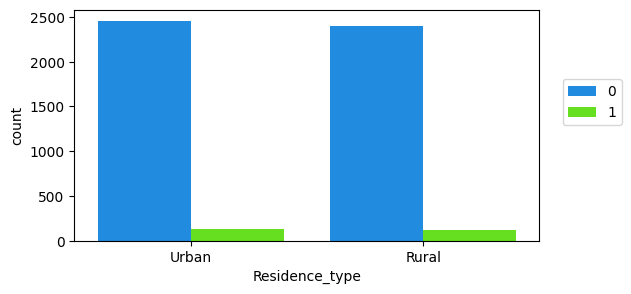

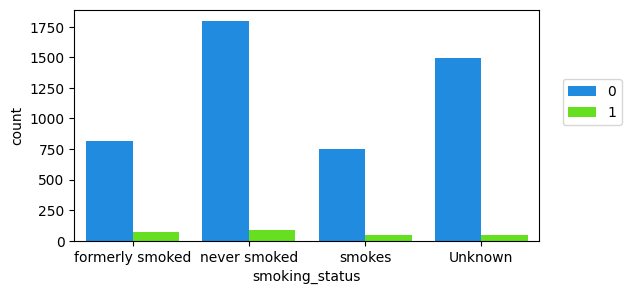

In [ ]:
# visualizing categorical features
for col in cat_features[:]:
  plt.figure(figsize=(6,3), dpi=100)
  sns.countplot(data=stroke, x=col, hue='stroke', palette='gist_rainbow_r')
  plt.legend(loc=(1.05,0.5))

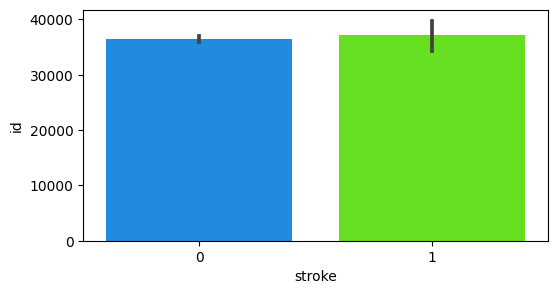

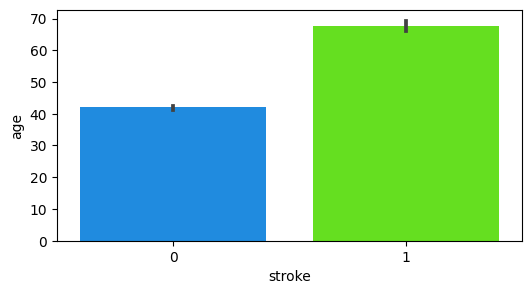

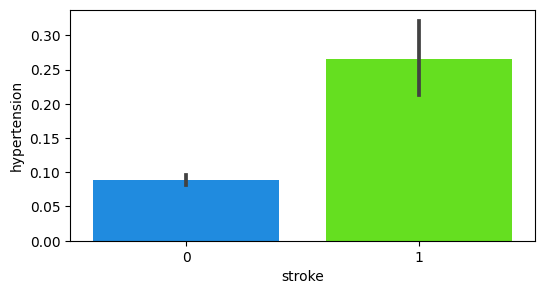

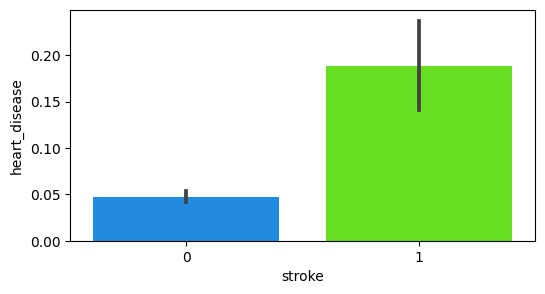

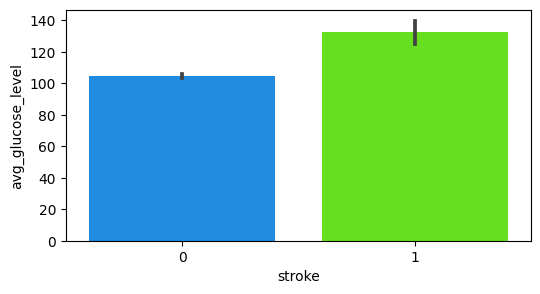

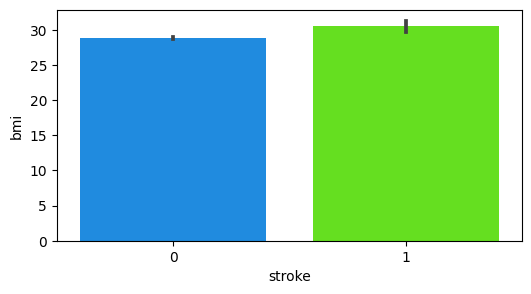

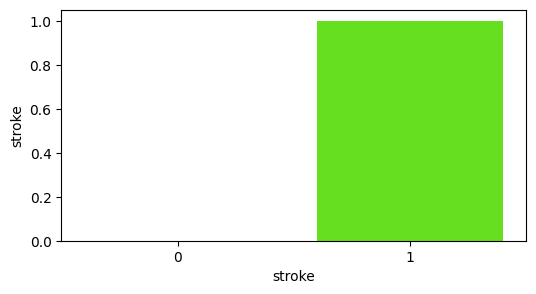

In [ ]:
# Plotting the barplot of numerical features
for col in numerical_features:
  plt.figure(figsize=(6,3), dpi=100)
  sns.barplot(data=stroke, x='stroke', y=col, palette='gist_rainbow_r')
  #plt.legend(loc=(1.05,0.5))

In [ ]:
# Handling the missing data
#if data is numerical then U can take mean median or mode
#if data is categorical then u can take mode
stroke['bmi']=stroke['bmi'].fillna(stroke['bmi'].mean())

In [ ]:
stroke.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
# dropping irrelevant feature "id"
train = stroke.drop(['id'], axis=1)
train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [ ]:
train.columns
# check there is no "id" column

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
train.shape

(5110, 11)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [ ]:
train_data_cat = train.select_dtypes("object")
train_data_num = train.select_dtypes("number")

In [ ]:
train_data_cat.head(3)

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked


In [ ]:
train_data_num.head(3)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.600000,1
1,61.0,0,0,202.21,28.893237,1
2,80.0,0,1,105.92,32.500000,1


In [ ]:
# converting categorical feature into numerical
train_data_cata_encoded = pd.get_dummies(train_data_cat, columns=train_data_cat.columns.to_list())
train_data_cata_encoded.head()

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
2,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0


In [ ]:
data=pd.concat([train_data_cata_encoded, train_data_num], axis=1, join="outer")
data.head()

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,...,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,67.0,0,1,228.69,36.600000,1
1,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,61.0,0,0,202.21,28.893237,1
2,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,80.0,0,1,105.92,32.500000,1
3,1,0,0,0,1,0,0,1,0,0,...,0,0,0,1,49.0,0,0,171.23,34.400000,1
4,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,79.0,1,0,174.12,24.000000,1


In [ ]:
# seperate dependent and independent feature
y = data['stroke']
x = data.drop('stroke', axis = 1) 


In [ ]:
print(x.shape)
print(y.shape)

(5110, 21)
(5110,)


In [ ]:
#scailing the data
sc = StandardScaler()
x = sc.fit_transform(x)


In [ ]:
x

array([[-1.18950991e+00,  1.18998977e+00, -1.39904618e-02, ...,
         4.18503199e+00,  2.70637544e+00,  1.00123401e+00],
       [ 8.40682358e-01, -8.40343359e-01, -1.39904618e-02, ...,
        -2.38946800e-01,  2.12155854e+00,  4.61555355e-16],
       [-1.18950991e+00,  1.18998977e+00, -1.39904618e-02, ...,
         4.18503199e+00, -5.02830130e-03,  4.68577254e-01],
       ...,
       [ 8.40682358e-01, -8.40343359e-01, -1.39904618e-02, ...,
        -2.38946800e-01, -5.11442636e-01,  2.21736316e-01],
       [-1.18950991e+00,  1.18998977e+00, -1.39904618e-02, ...,
        -2.38946800e-01,  1.32825706e+00, -4.27845098e-01],
       [ 8.40682358e-01, -8.40343359e-01, -1.39904618e-02, ...,
        -2.38946800e-01, -4.60867458e-01, -3.49895329e-01]])

In [ ]:
#splitting data into Training and Testing
#Importing ML toolkit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.svm import SVC
import pickle

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [ ]:
# seperate dependent and independent features
#y = data[stroke]
#x = data.drop('stroke', axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)
X_train.shape, X_test.shape

((3577, 21), (1533, 21))

In [ ]:
#Building the classifier


In [ ]:
accuracy = {} # for accuracies of different classifiers

In [ ]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)

y_pred1 = lr.predict(X_test)
print(accuracy_score(y_test, y_pred1))
accuracy[str(lr)] = accuracy_score(y_test, y_pred1)*100

0.9471624266144814


<Axes: >

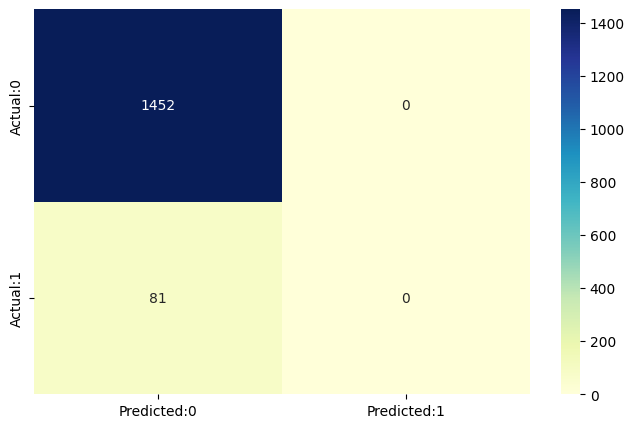

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred1)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
#classification Report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1452
           1       0.00      0.00      0.00        81

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.90      0.95      0.92      1533



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred_test = lr.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
    
})

In [ ]:
test.sample(10)

,Actual,Y test predicted
2346,0,0
1144,0,0
3212,0,0
3055,0,0
79,1,0
328,0,0
4380,0,0
5027,0,0
4544,0,0
3986,0,0


In [ ]:
#Handling this data using SMOTE

from imblearn.over_sampling import SMOTE


In [ ]:
smote = SMOTE()
x1, y1 = smote.fit_resample(x, y)

#print(y_oversample.value_counts())

In [ ]:
x1.shape

(9722, 21)

In [ ]:
y1.shape

(9722,)

In [ ]:
# Splitting the oversampling data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, shuffle='True', random_state=7)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(6805, 21)
(2917, 21)
(6805,)
(2917,)


In [ ]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
y_pred1 = lr.predict(X_test)
print(accuracy_score(y_test, y_pred1))
accuracy[str(lr)] = accuracy_score(y_test, y_pred1)*100

0.7943092218032225


<Axes: >

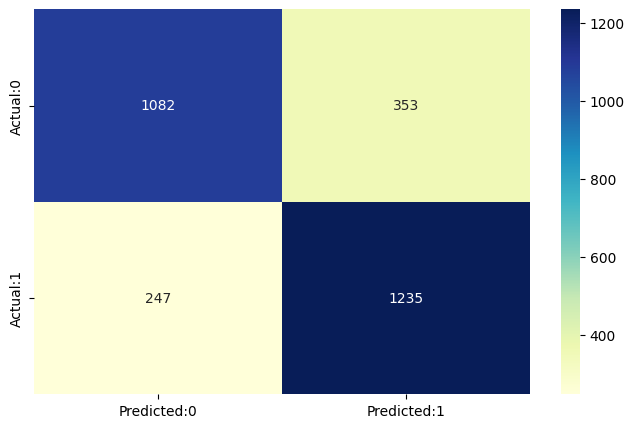

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix (y_test, y_pred1)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0', 'Predicted:1'], index=['Actual:0','Actual:1'])
plt.figure(figsize=(8,5))
sns.heatmap ( conf_matrix, annot=True, fmt='d', cmap='YlGnBu')


In [ ]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78      1435
           1       0.78      0.83      0.80      1482

    accuracy                           0.79      2917
   macro avg       0.80      0.79      0.79      2917
weighted avg       0.80      0.79      0.79      2917



In [ ]:
y_pred_test =lr.predict(X_test)
test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test

})

In [ ]:
test.sample(10)

,Actual,Y test predicted
9173,1,1
433,0,1
4666,0,1
9220,1,1
3409,0,0
7333,1,1
2393,0,0
2567,0,0
3210,0,1
3705,0,0


In [ ]:
# A machine Learning Task uses Deep Learning
import tensorflow as tf
from tensorflow import keras


In [ ]:
# create Neural Network